In [1]:
import matplotlib.pyplot as plt

import numpy as np

from timescales.fit import compute_acf, fit_acf
from timescales.sim import sim_spikes_synaptic, sim_exp_decay

### Mean of ACFs vs Single ACF
This notebook compares two ACF methods:

    1. Sum neurons and compute a single ACF.
    2. Compute the ACF of each neuron separately, and take the mean of all ACFs (Murray et al., 2014).
    
This notebook shows that either method can recover the simulated tau. However, the height of the ACF is much lower for method 2. This means that altough taus may be compared between the mean ACF and ground trough, the full fit cannot.

In [2]:
# Settings
n_seconds = 100
fs = 1000
tau = 0.01
nlags = 100
n_neurons = 100
mu = 100

probs, spikes = sim_spikes_synaptic(n_seconds, fs, tau, n_neurons=n_neurons, mu=mu, return_sum=False)

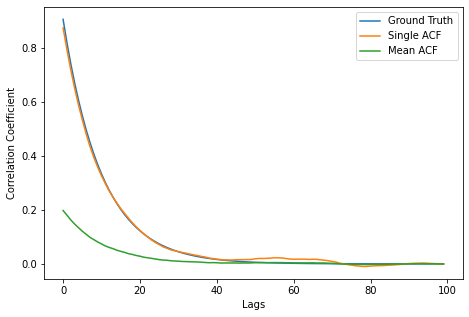

In [3]:
corrs_true = np.exp(-np.arange(nlags + 1) / (fs * tau))[1:]

plt.figure(figsize=(7.5, 5))
plt.plot(corrs_true, label='Ground Truth')

# Sum neuronal spikes, then take a single acf
corrs = compute_acf(spikes.sum(axis=0), nlags)
plt.plot(corrs, label='Single ACF')

_corrs = compute_acf(spikes, nlags)
plt.plot(_corrs.mean(axis=0), label='Mean ACF')

plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient')
plt.legend();

Despite the large scaling difference between the two ACF methods, the fit tau is ~= in either case. The full fit of the mean ACF method should not be compared to ground truth.

In [4]:
params, _, _ = fit_acf(corrs, fs)
params_, _, _ = fit_acf(_corrs.mean(axis=0), fs)

print('Tau of ground truth:  ', tau)
print('Tau of summed spikes: ', params[0])
print('Tau of summed acfs:   ', params_[0])

Tau of ground truth:   0.01
Tau of summed spikes:  0.010059865619565468
Tau of summed acfs:    0.01006818222212592


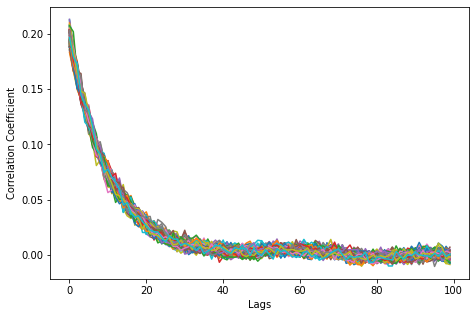

In [5]:
plt.figure(figsize=(7.5, 5))

for c in _corrs:
    plt.plot(c, label='')
    
plt.xlabel('Lags')
plt.ylabel('Correlation Coefficient');